In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [166]:
df = pd.read_csv("listings.csv")
df.head()

X = df.copy()
X = X.drop(["latitude","longitude","last_review","license"],axis = 1)
X = X.dropna()
X

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,City of Los Angeles,Beverlywood,34.048410,-118.387510,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
1,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,Other Cities,Beverly Hills,34.070583,-118.390742,Entire home/apt,434.0,30,0,NaN,NaN,4,267,0,NaN
2,1211025880050828732,Modern Hollywood Hills house,68445028,John,Other Cities,Beverly Hills,34.065140,-118.375820,Entire home/apt,319.0,1,0,NaN,NaN,25,365,0,NaN
3,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,Other Cities,Santa Monica,34.015590,-118.494080,Entire home/apt,231.0,5,44,2024-07-21,3.41,3,193,38,Exempt
4,5694422,2 Bedroom Modern Oasis,4151836,Sara,City of Los Angeles,Del Rey,33.990170,-118.422520,Entire home/apt,110.0,30,368,2023-05-04,3.21,2,117,0,HSR19-004352


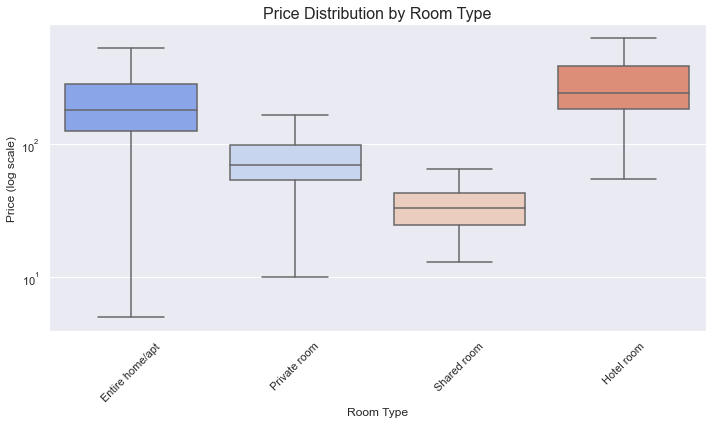

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X, x='room_type', y='price', palette='coolwarm', showfliers=False)
plt.title("Price Distribution by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price (log scale)", fontsize=12)
plt.yscale('log') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Regression 

In [171]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns; sns.set()
from scipy.stats import f

import math

In [173]:
df_2 = pd.read_csv("los_angelos_airBnb_listings.csv")
df_2.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,...,3.0,3.0,3.0,399.0,30,365,0,NaN,NaN,f
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,...,NaN,2.0,NaN,NaN,30,0,0,NaN,NaN,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,...,3.0,3.0,3.0,434.0,30,267,0,NaN,NaN,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,...,1.0,1.0,1.0,49.0,1,364,1,3.00,NaN,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,...,1.0,0.0,1.0,231.0,5,193,44,4.93,Exempt,t


In [174]:
X_2 = df_2.copy()
X_2.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,...,3.0,3.0,3.0,399.0,30,365,0,NaN,NaN,f
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,...,NaN,2.0,NaN,NaN,30,0,0,NaN,NaN,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,...,3.0,3.0,3.0,434.0,30,267,0,NaN,NaN,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,...,1.0,1.0,1.0,49.0,1,364,1,3.00,NaN,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,...,1.0,0.0,1.0,231.0,5,193,44,4.93,Exempt,t


In [175]:
X_2 = X_2.drop(["host_since","license","latitude","longitude"],axis = 1)
X_2["host_is_superhost"] = X_2["host_is_superhost"].map({"t":1, "f":0})
X_2["instant_bookable"] = X_2["instant_bookable"].map({"t":1, "f":0})
X_2.dropna()
X_2.head()

,id,name,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,...,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,within a few hours,0.96,0.0,West Los Angeles,City of Los Angeles,Entire condo,...,6,3.0,3.0,3.0,399.0,30,365,0,NaN,0
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,NaN,NaN,0.0,Beverlywood,City of Los Angeles,Entire rental unit,...,2,NaN,2.0,NaN,NaN,30,0,0,NaN,0
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,within a day,0.60,0.0,Beverly Hills,Other Cities,Entire home,...,6,3.0,3.0,3.0,434.0,30,267,0,NaN,0
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,a few days or more,0.20,0.0,Temple City,Other Cities,Private room in home,...,2,1.0,1.0,1.0,49.0,1,364,1,3.00,0
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,within an hour,1.00,1.0,Santa Monica,Other Cities,Entire rental unit,...,2,1.0,0.0,1.0,231.0,5,193,44,4.93,1


In [176]:

X_2['has_review'] = X_2['number_of_reviews'] > 0
X_2['has_review'] = X_2['has_review'].astype(int)
X_2

,id,name,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,has_review
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,within a few hours,0.96,0.0,West Los Angeles,City of Los Angeles,Entire condo,...,3.0,3.0,3.0,399.0,30,365,0,NaN,0,0
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,NaN,NaN,0.0,Beverlywood,City of Los Angeles,Entire rental unit,...,NaN,2.0,NaN,NaN,30,0,0,NaN,0,0
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,within a day,0.60,0.0,Beverly Hills,Other Cities,Entire home,...,3.0,3.0,3.0,434.0,30,267,0,NaN,0,0
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,a few days or more,0.20,0.0,Temple City,Other Cities,Private room in home,...,1.0,1.0,1.0,49.0,1,364,1,3.00,0,1
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,within an hour,1.00,1.0,Santa Monica,Other Cities,Entire rental unit,...,1.0,0.0,1.0,231.0,5,193,44,4.93,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,892894292387453414,"Cozy 1 Bed, 2 Bath apartment",111223499,Eric,NaN,NaN,0.0,Marina del Rey,Unincorporated Areas,Entire rental unit,...,NaN,1.0,NaN,NaN,1,0,0,NaN,0,0
45529,944430003646575559,DTLA Loft | Industrial | Central,528133129,Michael,NaN,NaN,0.0,Downtown,City of Los Angeles,Entire rental unit,...,NaN,NaN,NaN,NaN,30,89,0,NaN,0,0
45530,746345243817423719,"Long Beach, Rustic Suite 3 Beds, 1 Bath, 2 Rooms",484471086,Cabana,within an hour,1.00,0.0,Long Beach,Other Cities,Room in boutique hotel,...,NaN,2.0,NaN,NaN,31,244,0,NaN,1,0
45531,32943553,Charming Craftsman Bungalow w/ Outdoor Sauna,8110883,Christine,within an hour,1.00,1.0,Jefferson Park,City of Los Angeles,Entire home,...,1.0,0.0,1.0,116.0,2,141,212,4.84,1,1


In [177]:
threshold = X_2["price"].quantile(0.98)
X_2 = X_2[X_2["price"] < threshold]

In [178]:
correlation_matrix = X_2.corr()
correlation_matrix

,id,host_id,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,has_review
id,1.000000,0.448054,0.008944,-0.121078,0.101457,0.073529,0.096616,0.038543,0.025012,-0.137375,0.030943,-0.405981,-0.065060,0.178326,-0.349927
host_id,0.448054,1.000000,-0.038182,-0.126161,0.059395,0.001239,0.026817,0.032419,-0.022648,-0.147951,0.047908,-0.210501,-0.118325,0.186882,-0.184392
host_response_rate,0.008944,-0.038182,1.000000,0.222851,0.047246,0.010201,0.020517,0.039279,0.013910,-0.132818,-0.068496,0.090171,0.082513,0.069013,0.173051
host_is_superhost,-0.121078,-0.126161,0.222851,1.000000,0.064238,0.005273,0.033404,0.058912,0.015443,-0.162751,-0.120437,0.264723,0.222386,-0.033656,0.324038
accommodates,0.101457,0.059395,0.047246,0.064238,1.000000,0.631749,0.806714,0.770995,0.578922,-0.106628,0.030105,-0.042059,0.005431,0.070898,0.026525
bathrooms,0.073529,0.001239,0.010201,0.005273,0.631749,1.000000,0.737118,0.599102,0.578926,-0.011299,0.045355,-0.092371,0.001193,-0.011958,-0.041192
bedrooms,0.096616,0.026817,0.020517,0.033404,0.806714,0.737118,1.000000,0.761831,0.581557,-0.042798,0.030927,-0.092868,0.019308,0.009846,-0.021170
beds,0.038543,0.032419,0.039279,0.058912,0.770995,0.599102,0.761831,1.000000,0.456420,-0.070418,0.032642,-0.024454,0.007961,0.033394,0.041558
price,0.025012,-0.022648,0.013910,0.015443,0.578922,0.578926,0.581557,0.456420,1.000000,-0.050814,0.044837,-0.069037,0.060654,0.014417,-0.069849
minimum_nights,-0.137375,-0.147951,-0.132818,-0.162751,-0.106628,-0.011299,-0.042798,-0.070418,-0.050814,1.000000,0.119965,-0.169194,-0.000753,-0.124791,-0.182524


# Accodminations is the most correlated variable with price 

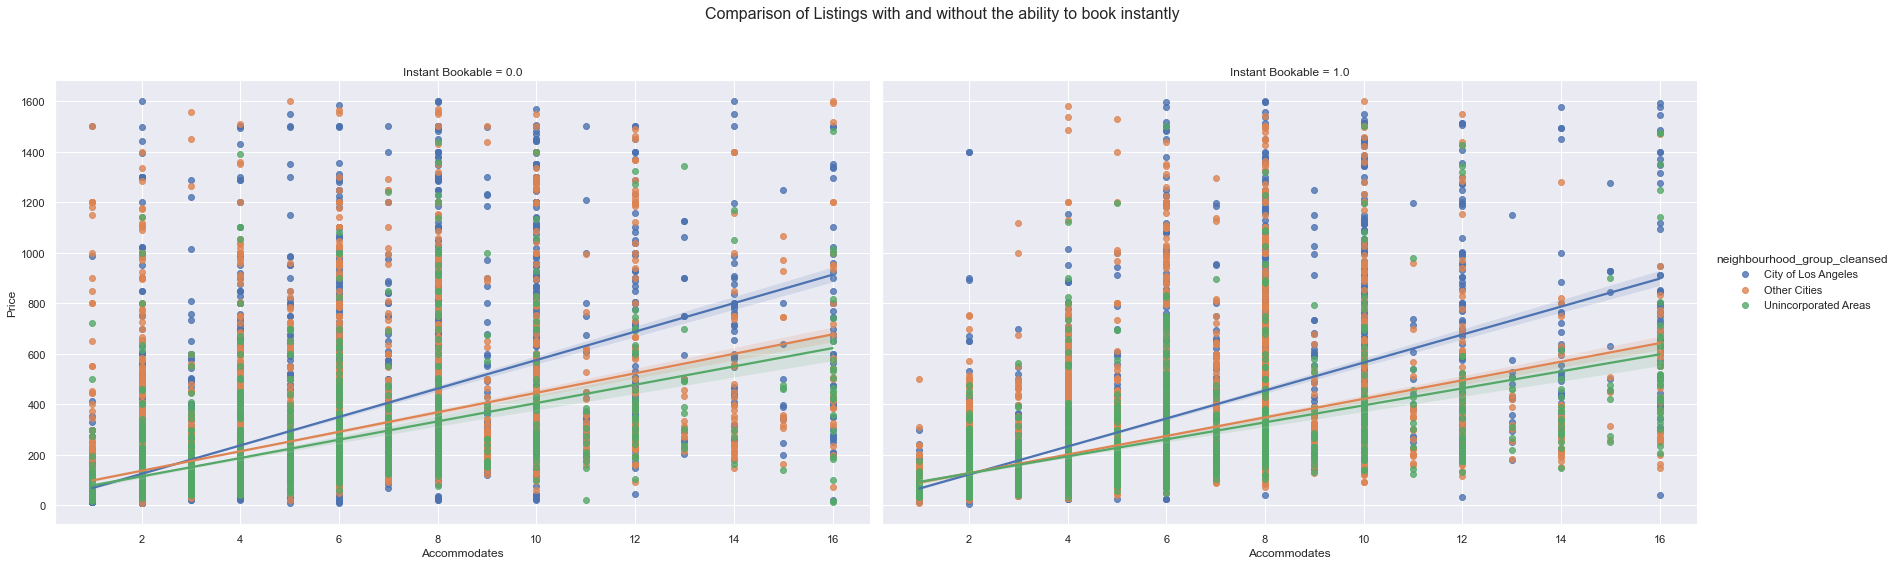

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt


plot = sns.lmplot(
    x="accommodates",
    y="price",
    hue="neighbourhood_group_cleansed",
    col="host_is_superhost", 
    data=X_2,
    height=8, 
    aspect=1.5, 
    col_wrap=2   
)


plot.fig.subplots_adjust(top=0.85) 
plot.fig.suptitle("Comparison of Listings with and without the ability to book instantly", fontsize=16)
plot.set_axis_labels("Accommodates", "Price")
plot.set_titles("Instant Bookable = {col_name}")  

plt.show()


# Regression 

In [180]:
X_2.head()

,id,name,host_id,host_name,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,has_review
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,within a few hours,0.96,0.0,West Los Angeles,City of Los Angeles,Entire condo,...,3.0,3.0,3.0,399.0,30,365,0,NaN,0,0
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,within a day,0.60,0.0,Beverly Hills,Other Cities,Entire home,...,3.0,3.0,3.0,434.0,30,267,0,NaN,0,0
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,a few days or more,0.20,0.0,Temple City,Other Cities,Private room in home,...,1.0,1.0,1.0,49.0,1,364,1,3.00,0,1
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,within an hour,1.00,1.0,Santa Monica,Other Cities,Entire rental unit,...,1.0,0.0,1.0,231.0,5,193,44,4.93,1,1
5,1082614257267236225,Practical Private Room #1398 A,557999481,Christos,within a day,1.00,0.0,North Hollywood,City of Los Angeles,Private room in rental unit,...,0.0,4.0,1.0,62.0,30,278,0,NaN,0,0


In [181]:
df_num = X_2[["host_response_rate","host_is_superhost","bathrooms","bedrooms","beds","price", "minimum_nights","availability_365","number_of_reviews","review_scores_rating","instant_bookable"]]
df_num.head()

,host_response_rate,host_is_superhost,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,0.96,0.0,3.0,3.0,3.0,399.0,30,365,0,NaN,0
2,0.60,0.0,3.0,3.0,3.0,434.0,30,267,0,NaN,0
3,0.20,0.0,1.0,1.0,1.0,49.0,1,364,1,3.00,0
4,1.00,1.0,1.0,0.0,1.0,231.0,5,193,44,4.93,1
5,1.00,0.0,0.0,4.0,1.0,62.0,30,278,0,NaN,0


In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = X_2[["host_response_rate", "host_is_superhost", "bathrooms", "bedrooms", 
         "beds", "minimum_nights", "availability_365", "number_of_reviews", 
         "review_scores_rating", "instant_bookable","accommodates"]]
y = X_2["price"]


X = X.fillna(X.mean())
y = y.fillna(y.mean())


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error: 27621.669908195963
R-squared: 0.44831042781391683
                Variable  Coefficient
0     host_response_rate   -12.768701
1      host_is_superhost    -3.989788
2              bathrooms    62.269183
3               bedrooms    28.692085
4                   beds   -16.187233
5         minimum_nights    -0.184586
6       availability_365     0.043705
7      number_of_reviews    -0.044928
8   review_scores_rating    30.956678
9       instant_bookable    -2.426946
10          accommodates    28.126434


In [184]:
Q1 = X_2.quantile(0.25)
Q3 = X_2.quantile(0.75)
IQR = Q3 - Q1


outliers = ((X_2 < (Q1 - 1.5 * IQR)) | (X_2 > (Q3 + 1.5 * IQR))).any(axis=1)

X_2_clean = X_2[~outliers]


In [185]:
results = smf.ols("price ~ host_response_rate + host_is_superhost + bathrooms + bedrooms + beds + minimum_nights + availability_365 + accommodates + number_of_reviews + review_scores_rating + instant_bookable", data=X_2_clean).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     936.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:45:00   Log-Likelihood:                -74907.
No. Observations:               13192   AIC:                         1.498e+05
Df Residuals:                   13181   BIC:                         1.499e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -162.3397     10.618    -15.290      0.000    -183.152    -141.528
host_response_rate    -162.3397     10.618    -15.290      0.000    -183.152    -141.528
host_is_superhost       -1.0237      1.317     -0.777      0.437      -3.606       1.558
bathrooms               24.6313      1.529     16.106      0.000      21.634      27.629
bedrooms                21.4501      1.314     16.325      0.000      18.875      24.026
beds                    -3.7399      0.959     -3.898      0.000      -5.620      -1.859
minimum_nights          -0.5829      0.048    -12.270      0.000      -0.676      -0.490
availability_365         0.0087      0.006      1.549      0.121      -0.002       0.020
accommodates            17.6381      0.611     28.846      0.000      16.440      18.837
number_of_reviews        0.1400      0.025      5.624      0.000       0.091       0.189
review_scores_rating    75.6260      4.321     17.500      0.000      67.155      84.097
instant_bookable         6.5439      1.437      4.555      0.000       3.728       9.360
==============================================================================
Omnibus:                     2355.866   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4618.886
Skew:                           1.089   Prob(JB):                         0.00
Kurtosis:                       4.912   Cond. No.                     3.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 0, 'Fitted Value')

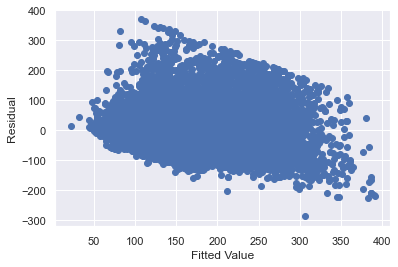

In [186]:
plt.scatter(results.fittedvalues, results.resid)
plt.ylabel("Residual")
plt.xlabel("Fitted Value")

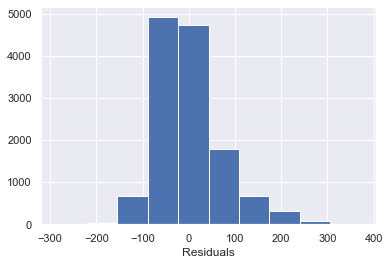

In [187]:
plt.hist(results.resid)
plt.xlabel("Residuals")
plt.show()

In [188]:
import statsmodels.formula.api as smf


formula = "price ~ host_response_rate + host_is_superhost + bathrooms + bedrooms + beds + minimum_nights + accommodates + availability_365 + number_of_reviews + review_scores_rating + instant_bookable"

results = smf.ols(formula, data=X_2_clean).fit()


while True:
    p_values = results.pvalues
    max_pval = p_values.drop("Intercept").max()  
    if max_pval > 0.05: 
        worst_feature = p_values.idxmax()
        print(f"Removing {worst_feature} with p-value {max_pval}")
        formula = formula.replace(f" + {worst_feature}", "").replace(f"{worst_feature} + ", "")
        results = smf.ols(formula, data=X_2_clean).fit()
    else:
        break
final_results = results

print(final_results.summary())


Removing host_is_superhost with p-value 0.43710936986369686
Removing availability_365 with p-value 0.17379493267093918
Removing host_response_rate with p-value 0.0971171917838636
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1297.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:45:00   Log-Likelihood:                -85687.
No. Observations:               15068   AIC:                         1.714e+05
Df Residuals:                   15059   BIC:                         1.715e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef

In [192]:
import statsmodels.formula.api as smf
import numpy as np


formula = "np.log(price) ~ host_response_rate + host_is_superhost + bathrooms + bedrooms + beds + minimum_nights + accommodates + availability_365 + number_of_reviews + review_scores_rating + instant_bookable"

final_results = smf.ols(formula, data=X_2).fit()


print(final_results.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     2031.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:11:31   Log-Likelihood:                -19737.
No. Observations:               24689   AIC:                         3.950e+04
Df Residuals:                   24677   BIC:                         3.959e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.6968 

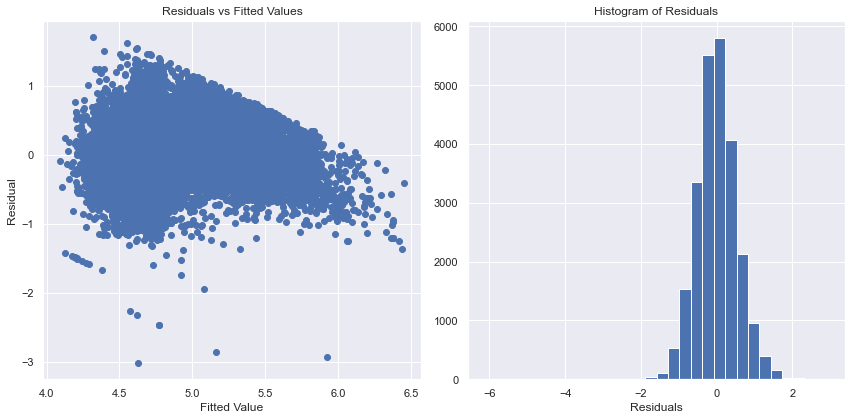

In [201]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].scatter(results.fittedvalues, results.resid)
axes[0].set_xlabel("Fitted Value")
axes[0].set_ylabel("Residual")
axes[0].set_title("Residuals vs Fitted Values")


axes[1].hist(final_results.resid, bins=30)
axes[1].set_xlabel("Residuals")
axes[1].set_title("Histogram of Residuals")


plt.tight_layout()
plt.show()


# PCA

In [220]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = X

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = data.select_dtypes(include=['object']).columns


data.replace(['NaN', 'nan', ''], np.nan, inplace=True)

# Now drop rows with NaN values
data_cleaned = data.dropna()



data = data_cleaned



In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = data.select_dtypes(include=['object']).columns


num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


transformer = ColumnTransformer(
    transformers=[
        ('num', num_imputer, numerical_cols),
        ('cat', cat_imputer, non_numerical_cols)
    ]
)


data_imputed = transformer.fit_transform(data)


data_imputed_df = pd.DataFrame(data_imputed, columns=numerical_cols.tolist() + non_numerical_cols.tolist())



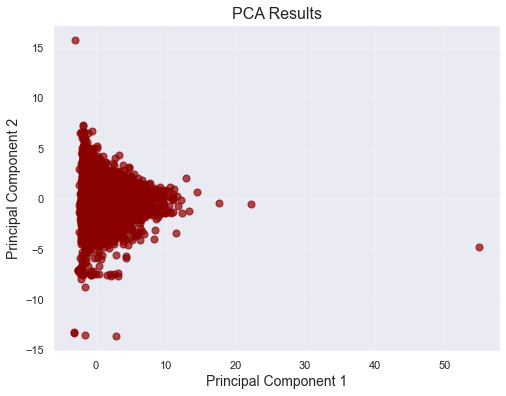

Explained variance ratio: [0.28831626 0.14964069]


In [231]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_imputed_df = data_imputed_df.apply(pd.to_numeric, errors='coerce')


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed_df)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)


pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='darkred', s=50, alpha=0.7)
plt.title('PCA Results', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


In [232]:
import pandas as pd
import numpy as np


features = data_imputed_df.columns


loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)


print(loadings)


                           PC1       PC2
host_response_rate    0.030394  0.362410
host_is_superhost     0.036559  0.553158
bathrooms             0.463840 -0.061534
bedrooms              0.521242 -0.027899
beds                  0.493773  0.019886
minimum_nights       -0.054151 -0.381056
availability_365      0.028878 -0.321983
number_of_reviews    -0.049267  0.471181
review_scores_rating  0.006945  0.292518
instant_bookable      0.029214 -0.025458
accommodates          0.509894  0.024744


In [233]:

top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False)


print("Top features for PC1:")
print(top_features_pc1.head(5))

print("\nTop features for PC2:")
print(top_features_pc2.head(5))


Top features for PC1:
bedrooms          0.521242
accommodates      0.509894
beds              0.493773
bathrooms         0.463840
minimum_nights    0.054151
Name: PC1, dtype: float64

Top features for PC2:
host_is_superhost     0.553158
number_of_reviews     0.471181
minimum_nights        0.381056
host_response_rate    0.362410
availability_365      0.321983
Name: PC2, dtype: float64


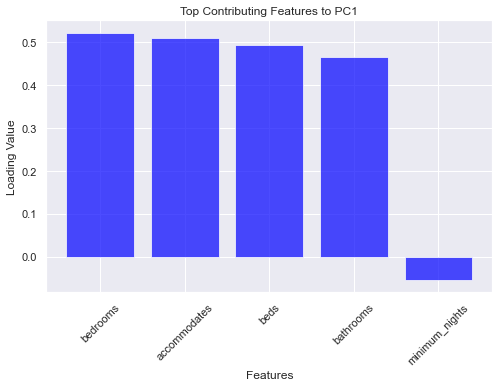

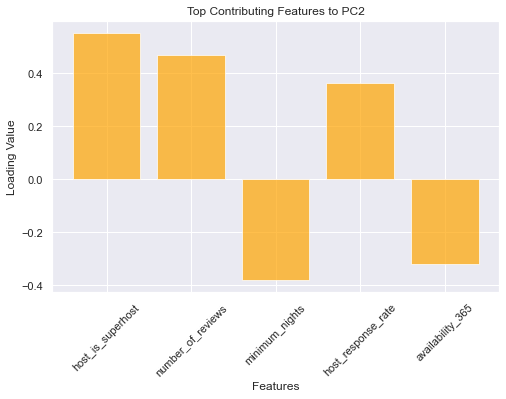

In [234]:
import matplotlib.pyplot as plt


top_pc1_features = top_features_pc1.head(5).index
plt.figure(figsize=(8, 5))
plt.bar(top_pc1_features, loadings.loc[top_pc1_features, 'PC1'], color='blue', alpha=0.7)
plt.title('Top Contributing Features to PC1')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.xticks(rotation=45)
plt.show()


top_pc2_features = top_features_pc2.head(5).index
plt.figure(figsize=(8, 5))
plt.bar(top_pc2_features, loadings.loc[top_pc2_features, 'PC2'], color='orange', alpha=0.7)
plt.title('Top Contributing Features to PC2')
plt.xlabel('Features')
plt.ylabel('Loading Value')
plt.xticks(rotation=45)
plt.show()
